<a href="https://colab.research.google.com/github/JMGARCIA97/24-03-A11/blob/main/Actividad_Clase_2_FMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

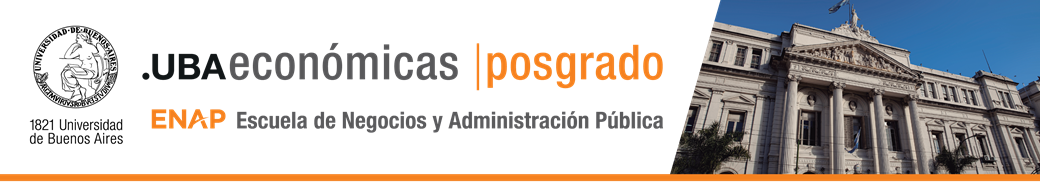

MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS (VIRTUAL)
# Fundamentos de Métodos Analíticos Predictivos (FMAP)

Rodrigo Del Rosso

**Actividad Propuesta - Clase 2**

**1. Importar el archivo "estado_resultados.csv" con la sentencia que le sea más práctico y útil. Puede exhibir distintas formas de importarlo si así lo desea. Utilice los módulos que considere necesarios para realizar la actividad.**

In [1]:
import pandas as pd # módulo para tratamiento de datos
import numpy as np # módulo para tratamiento de matrices
import missingno as msno # librería para tratamiento de datos perdidos
import matplotlib.pyplot as plt # módulo graficador

Como podrán observar la importación es directa, es decir, no hubo que descargar primero el archivo y luego invocarlo. Fue realizado directamente sobre el repositorio Google Drive.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/estado_resultados.csv', sep = ";")
print(df.shape)
df.head(100)

In [14]:
np.set_printoptions(precision = 200, suppress = True)

**2. Obtener estadísticas descriptivas y realizar los gráficos que considere necesarios para complementar a estas**

In [15]:
# Entendiendo nuestro set de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63409 entries, 0 to 63408
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   symbol                             63409 non-null  object 
 1   tipo                               63409 non-null  object 
 2   date                               63409 non-null  int64  
 3   researchDevelopment                49400 non-null  float64
 4   effectOfAccountingCharges          21348 non-null  float64
 5   incomeBeforeTax                    61720 non-null  float64
 6   minorityInterest                   36581 non-null  float64
 7   netIncome                          61732 non-null  float64
 8   sellingGeneralAdministrative       62029 non-null  float64
 9   grossProfit                        62149 non-null  float64
 10  ebit                               56909 non-null  float64
 11  nonOperatingIncomeNetOther         28568 non-null  flo

In [16]:
# Empezamos realizando un análisis descriptivo de las variables para entender sus dimensiones
df.describe()

,date,researchDevelopment,effectOfAccountingCharges,incomeBeforeTax,minorityInterest,netIncome,sellingGeneralAdministrative,grossProfit,ebit,nonOperatingIncomeNetOther,...,otherItems,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,preferredStockAndOtherAdjustments
count,63409.000000,4.940000e+04,21348.0,6.172000e+04,3.658100e+04,6.173200e+04,6.202900e+04,6.214900e+04,5.690900e+04,2.856800e+04,...,21348.0,5.984800e+04,6.230100e+04,5.782400e+04,6.100400e+04,5.882600e+04,2.645700e+04,5.784200e+04,6.140400e+04,4.231000e+03
mean,42816.893580,2.036189e+14,0.0,2.514921e+09,1.969974e+09,1.569901e+09,1.900676e+09,7.041322e+09,3.849521e+09,1.304822e+07,...,0.0,2.534453e+12,1.513172e+10,1.732746e+13,4.349723e+14,-7.061257e+08,-3.411188e+13,2.733379e+09,1.510810e+09,4.938286e+06
std,961.267353,1.422832e+16,0.0,1.490864e+11,6.171403e+10,9.465871e+10,1.072519e+11,3.172841e+11,1.998661e+11,2.767369e+08,...,0.0,6.198125e+14,8.169448e+11,4.158590e+15,2.062319e+16,5.830879e+15,6.177117e+15,1.184568e+11,9.355320e+10,7.105184e+07
min,37621.000000,-2.447700e+10,0.0,-5.578630e+12,-3.296105e+11,-7.193860e+12,-1.558200e+13,-1.968750e+13,-7.138120e+12,-8.368000e+09,...,0.0,-7.180000e+11,-2.388280e+12,-1.254540e+14,-5.837850e+11,-1.000000e+18,-1.000000e+18,-6.288980e+12,-7.193860e+12,-6.517090e+08
25%,42369.000000,0.000000e+00,0.0,-1.704500e+06,0.000000e+00,-2.415000e+06,1.781790e+07,4.484900e+07,0.000000e+00,-3.052500e+05,...,0.0,0.000000e+00,1.008610e+08,5.892275e+07,3.787300e+07,-3.810000e+07,0.000000e+00,-4.750125e+06,-2.857000e+06,0.000000e+00
50%,43159.000000,0.000000e+00,0.0,3.280300e+07,1.000000e+06,2.506550e+07,7.251000e+07,1.898130e+08,3.986500e+07,2.170000e+05,...,0.0,5.194500e+06,4.469600e+08,2.577005e+08,2.199875e+08,-3.719000e+06,0.000000e+00,2.342300e+07,2.480050e+07,0.000000e+00
75%,43465.000000,2.271725e+07,0.0,1.857858e+08,3.979200e+07,1.440215e+08,2.905010e+08,7.544210e+08,2.150000e+08,3.400000e+06,...,0.0,4.136025e+07,1.977920e+09,1.195342e+09,1.104088e+09,0.000000e+00,0.000000e+00,1.422710e+08,1.433085e+08,5.154800e+04
max,43890.000000,1.000000e+18,0.0,2.061390e+13,3.932000e+12,1.325100e+13,1.383070e+13,3.417900e+13,2.341520e+13,1.528900e+10,...,0.0,1.516300e+17,1.419920e+14,1.000000e+18,1.000000e+18,1.000000e+18,9.750030e+16,1.450200e+13,1.325100e+13,1.682000e+09


**3. Verificar la existencia de valores perdidos mediante la realización de un perfilamiento de los datos**

In [17]:
# explorando la cantidad de valores perdidos en las variables
df.isna().sum()/df.shape[0]*100

,0
symbol,0.000000
tipo,0.000000
date,0.000000
researchDevelopment,22.093078
effectOfAccountingCharges,66.332855
incomeBeforeTax,2.663660
minorityInterest,42.309451
netIncome,2.644735
sellingGeneralAdministrative,2.176347
grossProfit,1.987100


<Axes: >

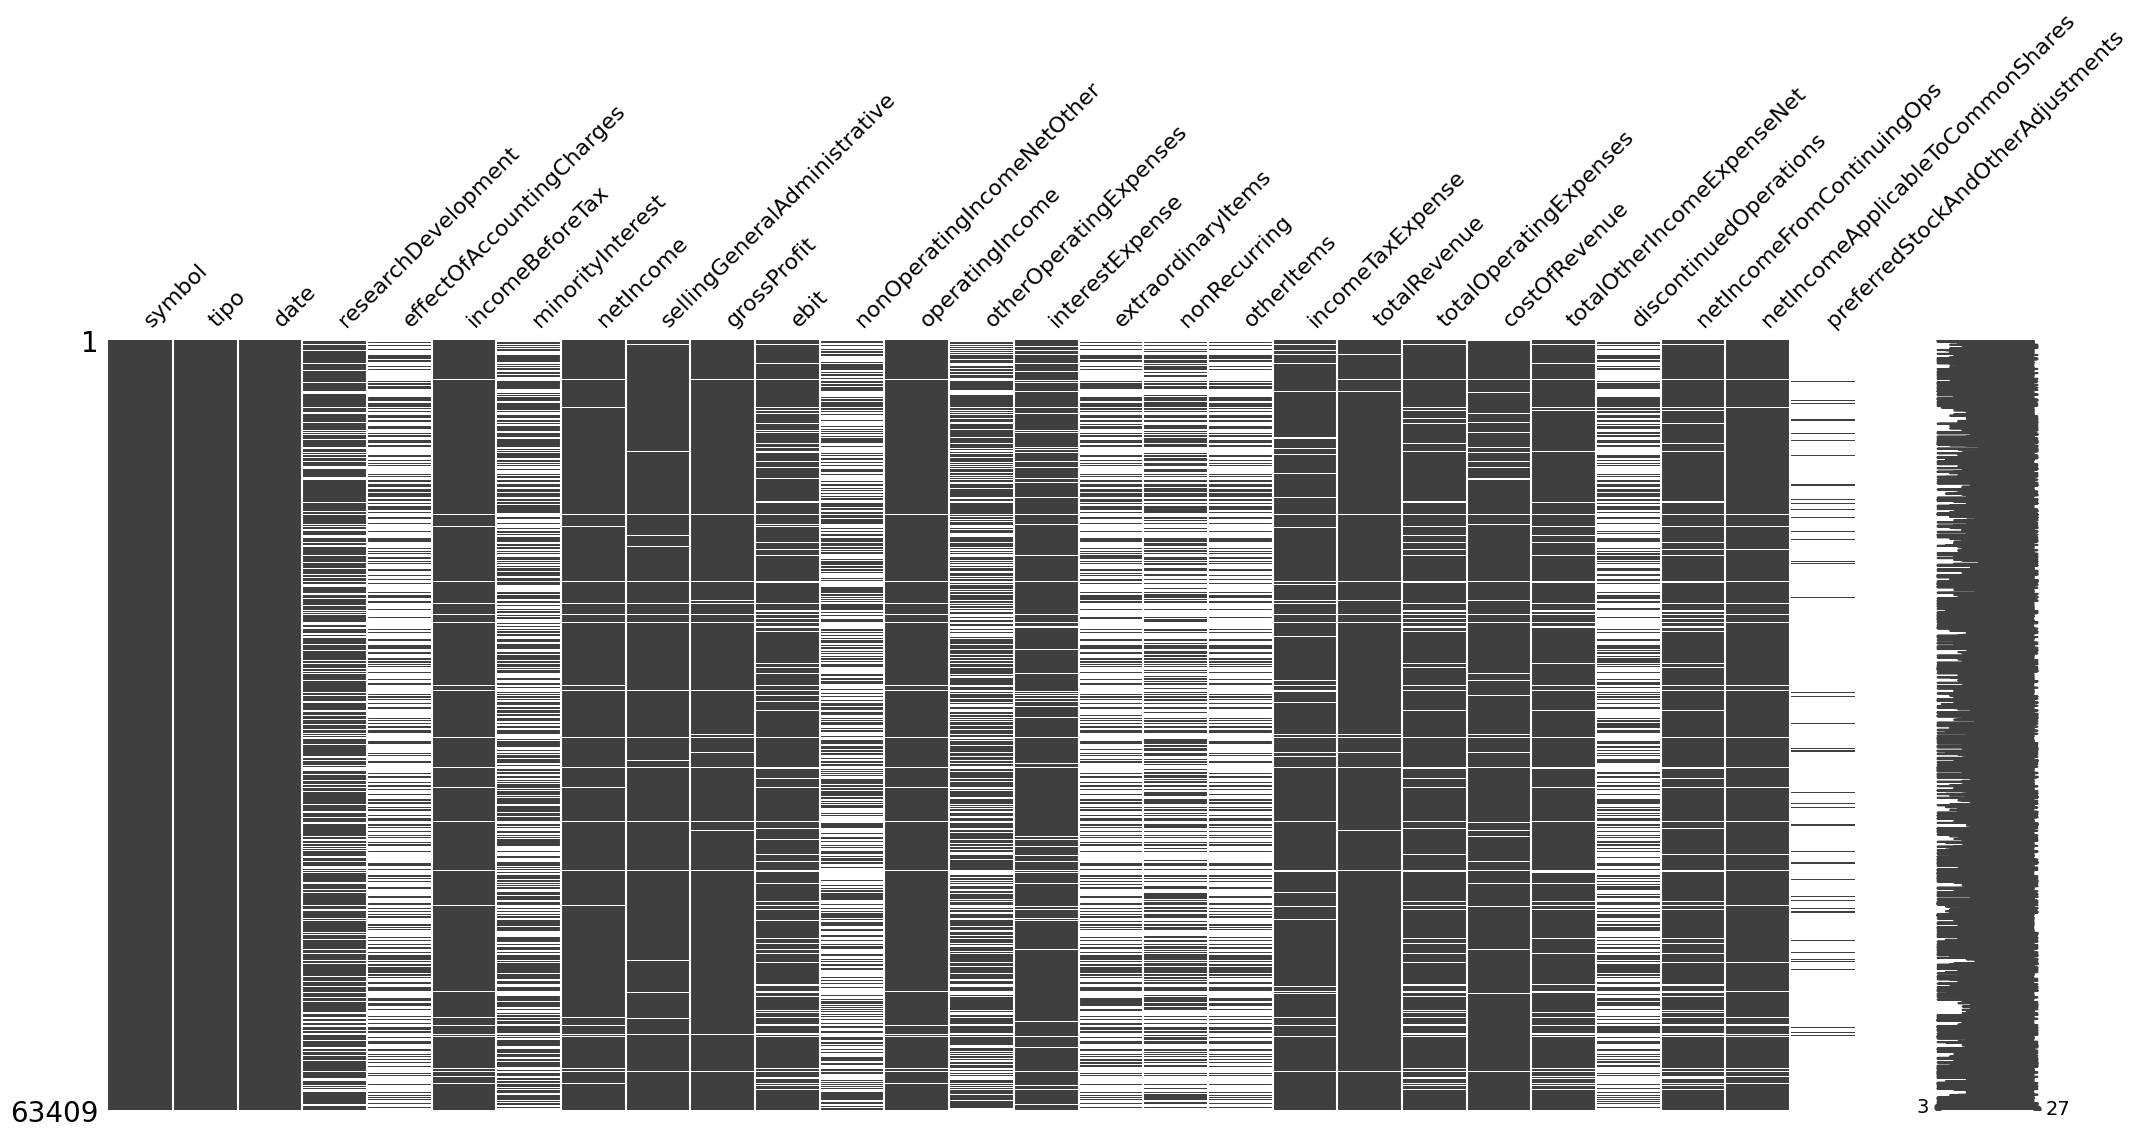

In [18]:
# matrix missing
msno.matrix(df)

<Axes: >

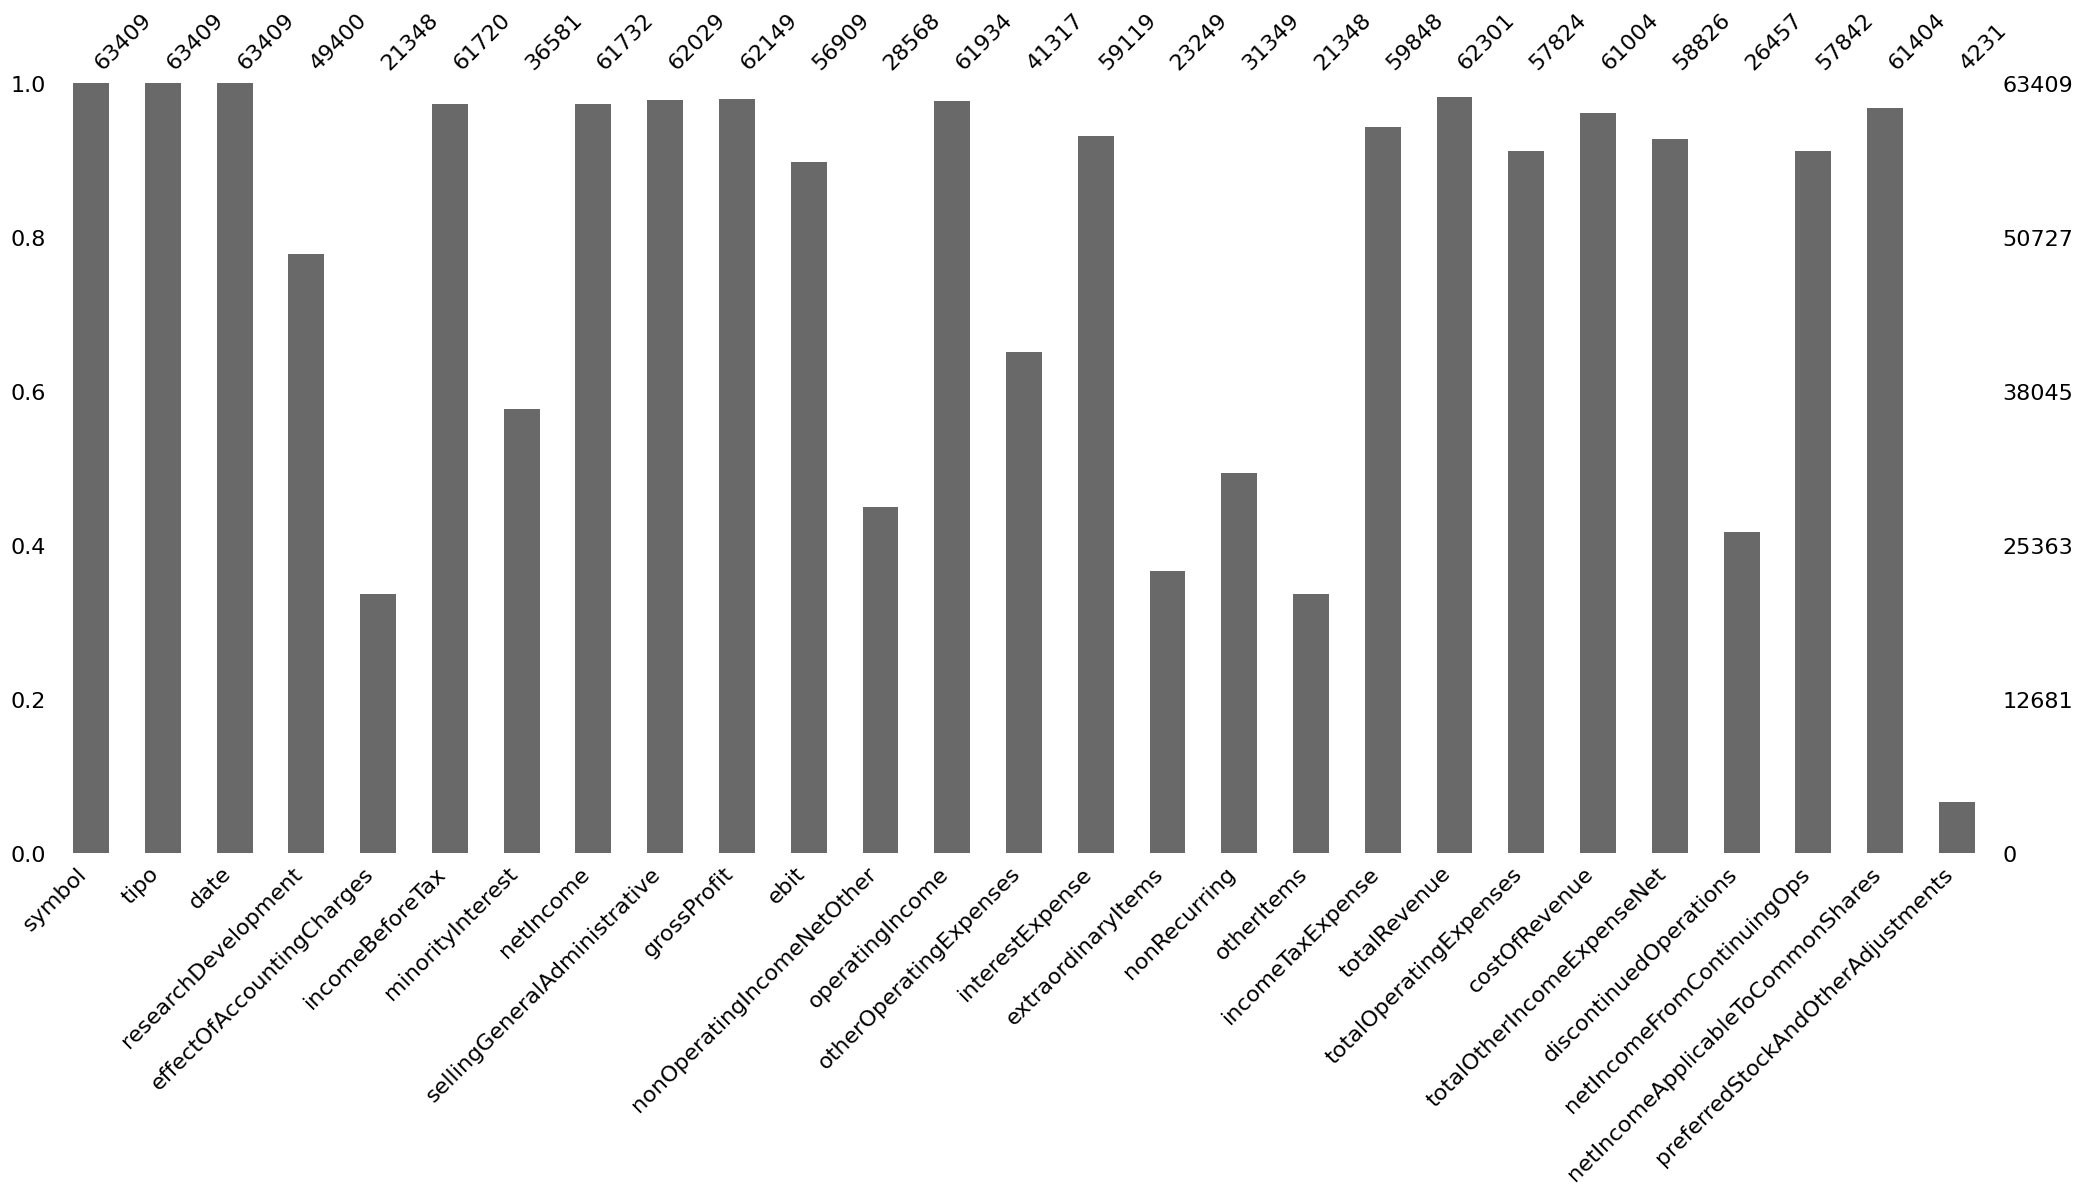

In [19]:
# bar missing
msno.bar(df)

**4. Para todas aquellas variables que posean datos faltantes, se le solicita que realice una imputación de valores perdidos con alguna de las técnicas vistas.**

In [26]:
import sklearn
from sklearn.impute import SimpleImputer

In [27]:
#calculo la media que luego verifico sea el valor imputado
print(df['effectOfAccountingCharges'].mean())
print(df['minorityInterest'].mean())
print(df['nonOperatingIncomeNetOther'].mean())
print(df['otherOperatingExpenses'].mean())
print(df['extraordinaryItems'].mean())
print(df['nonRecurring'].mean())
print(df['otherItems'].mean())
print(df['discontinuedOperations'].mean())
print(df['preferredStockAndOtherAdjustments'].mean())

0.0
1969973858.3768623
13048224.71233548
72697953939468.33
70363060.59310077
690174351808060.6
0.0
-34111876632668.562
4938285.998109194


In [35]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df['researchDevelopment'] = imp.fit_transform(df[['researchDevelopment']])
df['effectOfAccountingCharges'] = imp.fit_transform(df[['effectOfAccountingCharges']])
df['minorityInterest']= imp.fit_transform(df[['minorityInterest']])
df['nonOperatingIncomeNetOther']= imp.fit_transform(df[['nonOperatingIncomeNetOther']])
df['otherOperatingExpenses']= imp.fit_transform(df[['otherOperatingExpenses']])
df['extraordinaryItems']= imp.fit_transform(df[['extraordinaryItems']])
df['nonRecurring']= imp.fit_transform(df[['nonRecurring']])
df['otherItems']= imp.fit_transform(df[['otherItems']])
df['discontinuedOperations']= imp.fit_transform(df[['discontinuedOperations']])
df['preferredStockAndOtherAdjustments']= imp.fit_transform(df[['preferredStockAndOtherAdjustments']])

In [36]:
# explorando la cantidad de valores perdidos en las variables nuevamente
df.isna().sum()/df.shape[0]*100

,0
symbol,0.000000
tipo,0.000000
date,0.000000
researchDevelopment,0.000000
effectOfAccountingCharges,0.000000
incomeBeforeTax,2.663660
minorityInterest,0.000000
netIncome,2.644735
sellingGeneralAdministrative,2.176347
grossProfit,1.987100


In [37]:
# Empezamos realizando un análisis descriptivo de las variables para entender sus dimensiones
df.describe()

,date,researchDevelopment,effectOfAccountingCharges,incomeBeforeTax,minorityInterest,netIncome,sellingGeneralAdministrative,grossProfit,ebit,nonOperatingIncomeNetOther,...,otherItems,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,preferredStockAndOtherAdjustments
count,63409.000000,6.340900e+04,63409.0,6.172000e+04,6.340900e+04,6.173200e+04,6.202900e+04,6.214900e+04,5.690900e+04,6.340900e+04,...,63409.0,5.984800e+04,6.230100e+04,5.782400e+04,6.100400e+04,5.882600e+04,6.340900e+04,5.784200e+04,6.140400e+04,6.340900e+04
mean,42816.893580,2.036189e+14,0.0,2.514921e+09,1.969974e+09,1.569901e+09,1.900676e+09,7.041322e+09,3.849521e+09,1.304822e+07,...,0.0,2.534453e+12,1.513172e+10,1.732746e+13,4.349723e+14,-7.061257e+08,-3.411188e+13,2.733379e+09,1.510810e+09,4.938286e+06
std,961.267353,1.255858e+16,0.0,1.490864e+11,4.687419e+10,9.465871e+10,1.072519e+11,3.172841e+11,1.998661e+11,1.857494e+08,...,0.0,6.198125e+14,8.169448e+11,4.158590e+15,2.062319e+16,5.830879e+15,3.990027e+15,1.184568e+11,9.355320e+10,1.835158e+07
min,37621.000000,-2.447700e+10,0.0,-5.578630e+12,-3.296105e+11,-7.193860e+12,-1.558200e+13,-1.968750e+13,-7.138120e+12,-8.368000e+09,...,0.0,-7.180000e+11,-2.388280e+12,-1.254540e+14,-5.837850e+11,-1.000000e+18,-1.000000e+18,-6.288980e+12,-7.193860e+12,-6.517090e+08
25%,42369.000000,0.000000e+00,0.0,-1.704500e+06,1.350000e+05,-2.415000e+06,1.781790e+07,4.484900e+07,0.000000e+00,4.610000e+05,...,0.0,0.000000e+00,1.008610e+08,5.892275e+07,3.787300e+07,-3.810000e+07,-3.411188e+13,-4.750125e+06,-2.857000e+06,4.938286e+06
50%,43159.000000,8.812000e+06,0.0,3.280300e+07,1.990000e+08,2.506550e+07,7.251000e+07,1.898130e+08,3.986500e+07,1.304822e+07,...,0.0,5.194500e+06,4.469600e+08,2.577005e+08,2.199875e+08,-3.719000e+06,-3.411188e+13,2.342300e+07,2.480050e+07,4.938286e+06
75%,43465.000000,4.898270e+08,0.0,1.857858e+08,1.969974e+09,1.440215e+08,2.905010e+08,7.544210e+08,2.150000e+08,1.304822e+07,...,0.0,4.136025e+07,1.977920e+09,1.195342e+09,1.104088e+09,0.000000e+00,0.000000e+00,1.422710e+08,1.433085e+08,4.938286e+06
max,43890.000000,1.000000e+18,0.0,2.061390e+13,3.932000e+12,1.325100e+13,1.383070e+13,3.417900e+13,2.341520e+13,1.528900e+10,...,0.0,1.516300e+17,1.419920e+14,1.000000e+18,1.000000e+18,1.000000e+18,9.750030e+16,1.450200e+13,1.325100e+13,1.682000e+09
